# Pythonで動かしながら学ぶコンピュータネットワーク

## 第1章 コンピュータネットワークの基本要素

In [42]:
# Code1.1
class Node:
    def __init__(self, node_id, address=None):
        """
        ネットワーク内のノードを表すクラス
        
        :param node_id: ノードの一意の識別子
        :param address: ノードの簡易アドレス
        :param links: ノードに接続されたリンク
        """
        self.node_id = node_id
        self.address = address
        self.links = []
    
    def __str__(self):
        return f"ノード(ID: {self.node_id}, アドレス: {self.address})"
    
# 2つのノードを作成
node1 = Node(node_id=1, address="00:01")
node2 = Node(node_id=2, address="00:02")

# ノードの詳細を表示
print(node1)
print(node2)

ノード(ID: 1, アドレス: 00:01)
ノード(ID: 2, アドレス: 00:02)


In [43]:
# code1.2
class Node:
    def __init__(self,node_id,address=None):
        self.node_id = node_id
        self.address = address
        self.links = []

    # リンクを接続するメソッドを追加
    def add_link(self, link):
        if link not in self.links:
            self.links.append(link)
    
    # ノードの文字列表現を返すように修正
    def __str__(self):
        connected_nodes = [link.node_x.node_id if self != link.node_x else link.node_y.node_id for link in self.links]
        connected_nodes_str = ', '.join(map(str,connected_nodes))
        return f"ノード(ID: {self.node_id}, アドレス: {self.address}, 接続: {connected_nodes_str})"

class Link:
    def __init__(self, node_x, node_y, bandwidth=1, delay=0, packet_loss=0.0):
        """
        ネットワーク内の2つのノード間のリンクを表すLinkクラス。
        
        :param node_x: リンクの一方のノード。
        :param node_y: リンクのもう一方のノード。
        :param bandwidth: リンクの帯域幅（データ転送速度）。デフォルトは1。
        :param delay: リンクの遅延時間。デフォルトは0。
        :param packet_loss: リンクのパケットロス率（0.0から1.0の範囲）。デフォルトは0.0。
        """
        self.node_x = node_x
        self.node_y = node_y
        self.bandwidth = bandwidth
        self.delay = delay
        self.packet_loss = packet_loss

        # ノードに対して、リンクを接続
        node_x.add_link(self)
        node_y.add_link(self)

    def __str__(self):
        return f"リンク({self.node_x.node_id} ↔ {self.node_y.node_id}, 帯域幅: {self.bandwidth}, 遅延: {self.delay}, パケットロス率: {self.packet_loss})"

# 例；　ノード1とノード2をリンクで接続する
node1 = Node(node_id=1, address="00:01")
node2 = Node(node_id=2, address="00:02")
link = Link(node1,node2)

# ノードとリンクの詳細を表示
print(node1)
print(node2)
print(link)

ノード(ID: 1, アドレス: 00:01, 接続: 2)
ノード(ID: 2, アドレス: 00:02, 接続: 1)
リンク(1 ↔ 2, 帯域幅: 1, 遅延: 0, パケットロス率: 0.0)


In [44]:
# Code1.3
class Packet:
    def __init__(self, source, destination, payload):
        """
        ネットワーク内で送信されるパケットを表すPacketクラス。

        :param source: パケットの送信元ノードのアドレス。
        :param destination: バケットの宛先ノードのアドレス。
        :param payload: パケットに含まれるデータ(ペイロード)。
        """
        self.source = source
        self.destination = destination
        self.payload = payload
    
    def __str__(self):
        return f"パケット(送信元: {self.source}, 宛先: {self.destination}, ペイロード: {self.payload})"

In [45]:
# Code1.4
class Node:
    def __init__(self, node_id, address=None):
        self.node_id = node_id
        self.address = address
        self.links = []

    def add_link(self, link):
        if link not in self.links:
            self.links.append(link)
    
    # パケットを送信するメソッドを追加
    def send_packet(self, packet):
        if packet.destination == self.address:
            self.receive_packet(packet)
        else:
            for link in self.links:
                next_node = link.node_x if self != link.node_x else link.node_y
                print(f"ノード{self.node_id}からノード{next_node.node_id}へパケット転送")
                link.transfer_packet(packet, self)
                break
    
    # パケットを受信するメソッドを追加
    def receive_packet(self, packet):
        print(f"ノード{self.node_id}がパケット受信: {packet.payload}")

    def __str__(self):
        connected_nodes = [link.node_x.node_id if self != link.node_x else link.node_y.node_id for link in self.links]
        connected_nodes_str = ', '.join(map(str, connected_nodes))
        return f"ノード(ID: {self.node_id}, アドレス: {self.address}, 接続: {connected_nodes_str})"

In [46]:
# Code1.5
class Link:
    def __init__(self, node_x, node_y, bandwidth=1, delay=0, packet_loss=0.0):
        self.node_x = node_x
        self.node_y = node_y
        self.bandwidth = bandwidth
        self.delay = delay
        self.packet_loss = packet_loss

        node_x.add_link(self)
        node_y.add_link(self)

    # 次のノードへパケットを渡すメソッドを追加
    def transfer_packet(self, packet, from_node):
        next_node = self.node_x if from_node != self.node_x else self.node_y
        next_node.receive_packet(packet)

    def __str__(self):
        return f"リンク({self.node_x.node_id} ↔ {self.node_y.node_id}, 帯域幅: {self.bandwidth}, 遅延: {self.delay}, パケットロス率: {self.packet_loss})"

In [47]:
# Code1.6
node1 = Node(node_id=1, address="00:01")
node2 = Node(node_id=2, address="00:02")

link1 = Link(node1, node2)

# パケットの作成と送信
packet = Packet(source=node1.address, destination=node2.address, payload="Hello, Node2!")
node1.send_packet(packet)

ノード1からノード2へパケット転送
ノード2がパケット受信: Hello, Node2!


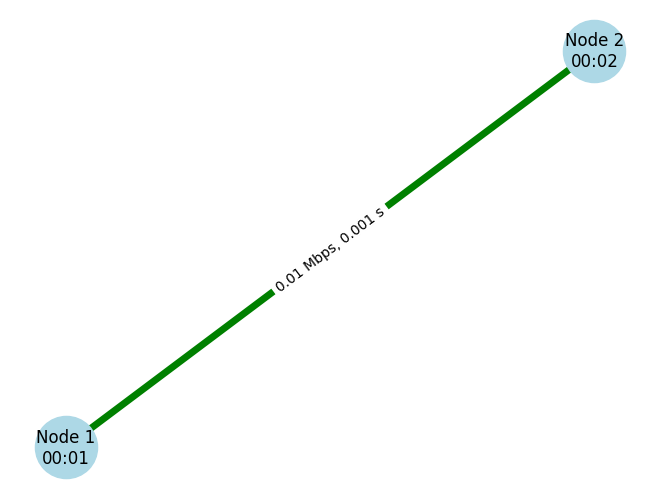

In [48]:
# Code1.7
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

class NetworkGraph:
    def __init__(self):
        self.graph = nx.Graph()

    def add_node(self, node_id, label):
        self.graph.add_node(node_id, label=label)
    
    def add_link(self, node1_id, node2_id, label, bandwidth, delay):
        self.graph.add_edge(node1_id, node2_id, label=label, bandwidth=bandwidth, delay=delay)

    def draw(self):
        # リンクの帯域幅に基づいて線の太さを決定する関数
        def get_edge_width(bandwidth):
            return np.log10(bandwidth)+1 # bps単位での対数スケール
        
        # リンクの遅延に基づいて線の色を決定する関数
        def get_edge_color(delay):
            if delay <= 0.001: # 1ms以下
                return 'green'
            elif delay <= 0.01: # 1-10ms
                return 'yellow'
            else: # 10ms以上
                return 'red'
            
        pos = nx.spring_layout(self.graph)
        edge_widths = [get_edge_width(self.graph[u][v]['bandwidth']) for u, v in self.graph.edges()]
        edge_colors = [get_edge_color(self.graph[u][v]['delay']) for u, v in self.graph.edges()]
        nx.draw(self.graph, pos, with_labels=False, node_color='lightblue', node_size=2000, width=edge_widths, edge_color=edge_colors)
        nx.draw_networkx_labels(self.graph, pos, labels=nx.get_node_attributes(self.graph, 'label'))
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=nx.get_edge_attributes(self.graph, 'label'))
        plt.show()

class Node:
    def __init__(self, node_id, address, network_graph):
        self.node_id = node_id
        self.address = address
        self.links = []
        self.network_graph = network_graph

        # グラフにノードを追加
        label = f'Node {node_id}\n{address}'
        self.network_graph.add_node(node_id, label)

    def add_link(self, link):
        if link not in self.links:
            self.links.append(link)

    def send_packet(self, packet):
        if packet.destination == self.address:
            self.receive_packet(packet)
        else:
            for link in self.links:
                next_node = link.node_x if self != link.node_x else link.node_y
                print(f"ノード {self.node_id}からノード{next_node.node_id}へパケット転送")
                link.transfer_packet(packet, self)
                break
    
    def receive_packet(self, packet):
        print(f"ノード{self.node_id}がパケットを受信: {packet.payload}")
    
    def __str__(self):
        connected_nodes = [link.node_x.node_id if self != link.node_x else link.node_y.node_id for link in self.links]
        connected_nodes_str = ', '.join(map(str, connected_nodes))
        return f"ノード(ID: {self.node_id}, アドレス: {self.address}, 接続: {connected_nodes_str})"

class Link:
    def __init__(self, node_x, node_y, network_graph, bandwidth=10000, delay=0.001, packet_loss=0.0):
        self.node_x = node_x
        self.node_y = node_y
        self.bandwidth = bandwidth
        self.delay = delay
        self.packet_loss = packet_loss
        self.network_graph = network_graph

        node_x.add_link(self)
        node_y.add_link(self)

        # グラフにリンクを追加
        label = f'{bandwidth/1000000} Mbps, {delay} s'
        self.network_graph.add_link(node_x.node_id, node_y.node_id, label, self.bandwidth, self.delay)

    def transfer_packet(self, packet, from_node):
        next_node = self.node_x if from_node != self.node_x else self.node_y
        next_node.receive_packet(packet)

    def __str__(self):
        return f"リンク({self.node_x.node_id} ↔ {self.node_y.node_id}, 帯域幅: {self.bandwidth}, 遅延: {self.delay}, パケットロス率: {self.packet_loss})"
    
class Packet:
    def __init__(self, source, destination, payload):
        self.source = source
        self.destination = destination
        self.payload = payload

    def __str__(self):
        return f"パケット(送信元: {self.source}, 宛先: {self.destination}, ペイロード: {self.payload})"
    
# ネットワークグラフのインスタンスを作成
network_graph = NetworkGraph()

# ノードとリンクの宣言
node1 = Node(node_id=1, address='00:01', network_graph=network_graph)
node2 = Node(node_id=2, address='00:02', network_graph=network_graph)
link1 = Link(node1, node2, network_graph=network_graph)

# グラフを描画
network_graph.draw()

In [49]:
# Practice1-1
network_graph = NetworkGraph()

node1 = Node(node_id=1, address="00:01",network_graph=network_graph)
node2 = Node(node_id=2, address="00:02",network_graph=network_graph)
link1 = Link(node1, node2, network_graph=network_graph)

# パケットの作成と送信
packet = Packet(source=node2.address, destination=node1.address, payload="Hello, Node1!")
node1.send_packet(packet)

ノード1がパケットを受信: Hello, Node1!


In [50]:
# Practice1-2
payload_list = ["1","2","3","4","5","6","7","8","9","10"]
for payload in payload_list:
    packet = Packet(source=node1.address, destination=node2.address, payload=payload)
    node1.send_packet(packet)

ノード 1からノード2へパケット転送
ノード2がパケットを受信: 1
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 2
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 3
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 4
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 5
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 6
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 7
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 8
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 9
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 10


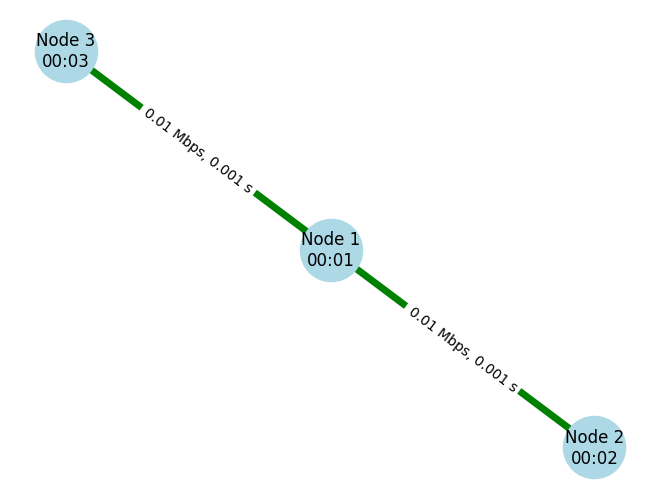

In [51]:
# Practice2-1
node3 = Node(node_id=3, address='00:03', network_graph=network_graph)
link1 = Link(node1, node3, network_graph=network_graph)

# グラフを描画
network_graph.draw()

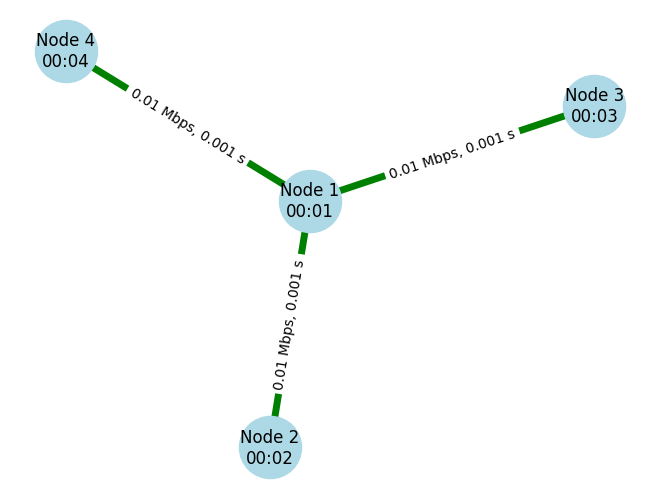

In [52]:
# Practice2-2
node4 = Node(node_id=4, address='00:04', network_graph=network_graph)
link1 = Link(node1, node4, network_graph=network_graph)

# グラフを描画
network_graph.draw()

## 第2章　ネットワークと時間

In [53]:
import uuid

class Packet:
    # Packetクラスのコンストラクタ
    def __init__(self, source, destination, header_size, payload_size, network_event_scheduler):
        self.network_event_scheduler = network_event_scheduler
        self.id = str(uuid.uuid4()) # パケットに一意のID（UUID）を割り当てる
        
        # パケットのヘッダ情報を辞書で定義
        self.header = {
            "source": source,              # 送信元アドレス
            "destination": destination     # 宛先アドレス
        }
        self.payload = 'X' * payload_size     # パケットのペイロード（実際に送信するデータ）
        self.size = header_size + payload_size     # パケット全体のサイズ
        self.creation_time = self.network_event_scheduler.current_time     # パケット生成時刻の記録
        self.arrival_time = None     # パケット到着時刻（初期値はNone）

    # 到着時刻を設定するメソッド
    def set_arrived(self, arrival_time):
        self.arrival_time = arrival_time     # 到着時刻を設定
    
    # heapqモジュールでの比較のための特殊メソッド
    # この実装では比較を行わないため、常にFalseを返す
    def __lt__(self, other):
        return False
    
    # パケットの文字列表現を返す特殊メソッド
    def __str__(self):
        return f'パケット(送信元: {self.header["source"]}, 宛先: {self.header["destinatino"]}, ペイロード: {self.payload})'

In [54]:
# Code2.2
import heapq     # heapqモジュールをインポート（優先度付きキューのため）
import random     # randomモジュールをインポート（パケットロスのシミュレーションのため）

class Link:
    # Linkクラスのコンストラクタ
    def __init__(self, node_x, node_y, bandwidth, delay, loss_rate, network_event_scheduler):
        self.network_event_scheduler = network_event_scheduler
        self.node_x = node_x     # リンクの一方のノード
        self.node_y = node_y     # リンクの他方のノード
        self.bandwidth = bandwidth     # リンクの帯域幅(bps)
        self.delay = delay     # リンクの遅延(秒)
        self.loss_rate = loss_rate     # パケットロス率
        self.packet_queue_xy = []   # node_xからnode_yへのパケットキュー
        self.packet_queue_yx = []   # node_yからnode_xへのパケットキュー
        self.current_queue_time_xy = 0  # node_xからnode_yへのキュー時間
        self.current_queue_time_yx = 0  # node_yからnode_xへのキュー時間
        node_x.add_link(self)   # node_xにこのリンクを追加
        node_y.add_link(self)   # node_yにこのリンクを追加
        label = f'{bandwidth/1000000} Mbps, {delay} s'
        self.network_event_scheduler.add_link(node_x.node_id, node_y.node_id, label, self.bandwidth, self.delay)

    # パケットをキューに追加するメソッド
    def enqueue_packet(self, packet, from_node):
        # xy方向かyx方向かを判定
        if from_node == self.node_x:
            queue = self.packet_queue_xy
            current_queue_time = self.current_queue_time_xy
        else:
            queue = self.packet_queue_yx
            current_queue_time = self.current_queue_time_yx
        
        # 当該パケットの転送に要する時間を計算
        packet_transfer_time = (packet.size*8)/self.bandwidth
        # パケットのデキュー予定時刻を計算
        dequeue_time = self.network_event_scheduler.current_time + current_queue_time
        # パケットをキューに追加し、キュー時間を更新
        heapq.heappush(queue, (dequeue_time, packet, from_node))
        self.add_to_queue_time(from_node, packet_transfer_time)
        # 最初のパケットの場合、イベントをスケジュール
        if len(queue) == 1:
            self.network_event_scheduler.schedule_event(dequeue_time, self.trasfer_packet, from_node)
    
    # パケットを転送するメソッド
    def transfer_packet(self, from_node):
        # xy方向かyx方向かを判定
        if from_node == self.node_x:
            queue = self.packet_queue_xy
        else:
            queue = self.packet_queue_yx
        
        if queue:
            dequeue_time, packet, _ = heapq.heappop(queue)
            packet_transfer_time = (packet.size*8)/self.bandwidth

            # 確率的にパケットロスを発生させる
            if random.random() < self.loss_rate:
                packet.set_arrived(-1)
            
            next_node = self.node_x if from_node != self.node_x else self.node_y
            # 遅延を考慮したイベントスケジュール
            self.network_event_scheduler.schedule_event(self.network_event_scheduler.current_time + self.delay, next_node.receive_packet, packet)
            self.network_event_scheduler.schedule_event(dequeue_time + packet_transfer_time, self.subtract_from_queue_time, from_node, packet_transfer_time)

            # 次のイベントがある場合、そのイベントをスケジュール
            if queue:
                next_packet_time = queue[0][0]
                self.network_event_scheduler.schedule_event(next_packet_time, self.transfer_packet, from_node)

            # キュー時間を増やすメソッド
            def add_to_queue_time(self, from_node, packet_transfer_time):
                if from_node == self.node_x:
                    self.current_queue_time_xy += packet_transfer_time
                else:
                    self.current_queue_time_yx += packet_transfer_time
            
            # キュー時間を減らすメソッド
            def subtract_to_queue_time(self, from_node, packet_transfer_time):
                if from_node == self.node_x:
                    self.current_queue_time_xy -= packet_transfer_time
                else:
                    self.current_queue_time_yx -= packet_transfer_time
            
            # リンクの文字列表現を返す特殊メソッド
            def __str__(self):
                return f"リンク({self.node_x.node_id} ↔ {self.node_y.node_id}, 帯域幅: {self.bandwidth}, 遅延: {self.delay}, パケットロス率: {self.loss_reate})"            

In [55]:
# Code2.3
class Node:
    # Nodeクラスのコンストラクタ
    def __init__(self, node_id, address, network_event_scheduler):
        self.network_event_scheduler = network_event_scheduler
        self.node_id = node_id  # ノードのID
        self.address = address  # ノードのアドレス
        self.links = [] # このノードに接続されているリンクのリスト
        label = f'Node {node_id}\n{address}'
        self.network_event_scheduler.add_node(node_id, label)   # ネットワークイベントスケジューラにノードを追加

    # ノードを追加するメソッド
    def add_link(self, link):
        if link not in self.links:
            self.links.append(link) # リンクがまだリストになければ追加

    # パケットを受信するメソッド
    def receive_packet(self, packet):
        # パケットが失われた場合(到着時間が―1の場合)の処理
        if packet.arrival_time == -1:
            self.network_event_scheduler.log_packet_info(packet, "lost", self.node_id)  # パケットのロスをログに記録
            return
        # パケットが正常に到着した場合の処理
        if packet.header["destination"] == self.address:
            self.network_event_scheduler.log_packet_info(packet, "arrived", self.node_id)   # パケットの到着をログに記録
        else:
            self.network_event_scheduler.log_packet_info(packet, "received", self.node_id)  # パケットの受信をログに記録
    
    # パケットを送信するメソッド
    def send_packet(self, packet):
        self.network_event_scheduler.log_packet_info(packet, "sent", self.node_id)  # パケットの送信をログに記録
        if packet.header["destination"] == self.address:
            self.receive_packet(packet) # 宛先が自分自身の場合は受信処理を行う
        else:
            for link in self.links:
                next_node = link.node_x if self != link.node_x else link.node_y
                link.enqueue_packet(packet, self)   # リンクを通じてパケットを送信
                break   # 最初のリンクを使って送信した後、ループを抜ける
    
    # パケットを生成するメソッド
    def create_packet(self, destination, header_size, payload_size):
        packet = Packet(source=self.address, destination=destination, header_size=header_size, payload_size=payload_size, 
                        network_event_scheduler=self.network_event_scheduler)   # パケットを生成
        self.network_event_scheduler.log_packet_info(packet, "created", self.node_id)   # パケットの生成をログに記録
        self.send_packet(packet)    # 生成したパケットを送信

    #  トラフィックを設定するメソッド
    def set_traffic(self, destination, bitrate, start_time, duration, header_size, payload_size, bursiness=1.0):
        end_time = start_time + duration    # トラフィックの終了時刻
        def generate_packet():
            if self.network_event_scheduler.current_time < end_time:
                self.create_packet(destination, header_size, payload_size)  # パケットを生成して送信
                packet_size = header_size + payload_size
                interval = (packet_size*8)/bitrate*bursiness    # 次のパケットを生成するまでの間隔
                self.network_event_scheduler.schedule_event(self.network_event_scheduler.current_time + interval, generate_packet)
        
        self.network_event_scheduler.schedule_event(start_time, generate_packet)    # 最初のパケット生成イベントをスケジュール

    # ノードの文字列表現を返す特殊メソッド
    def __str__(self):
        # 接続されているノードのIDを取得
        connected_nodes = [link.node_x.node_id if self != link.node_x else link.node_y.node_id for link in self.links]
        connected_nodes_str = ', '.join(map(str, connected_nodes))
        return f"ノード(ID: {self.node_id}, アドレス: {self.address}, 接続: {connected_nodes_str})"

In [56]:
# Code2.4
import matplotlib.pyplot as plt
import networkx as nx
import heapq
import uuid
import random
import numpy as np
from collections import defaultdict

class NetworkEventScheduler:
    def __init__(self, log_enabled=False, verbose=False):
        self.current_time = 0
        self.events = []
        self.event_id = 0
        self.packet_logs = {}
        self.log_enabled = log_enabled
        self.verbose = verbose
        self.graph = nx.Graph()

    def add_node(self, node_id, label):
        self.graph.add_node(node_id, label=label)

    def add_link(self, node1_id, node2_id, label, bandwidth, delay):
        self.graph.add_edge(node1_id, node2_id, label=label, bandwidth=bandwidth, delay=delay)

    def draw(self):
        def get_edge_width(bandwidth):
            return np.log10(bandwidth) + 1

        def get_edge_color(delay):
            if delay <= 0.001:  # <= 1ms
                return 'green'
            elif delay <= 0.01:  # 1-10ms
                return 'yellow'
            else:  # >= 10ms
                return 'red'

        pos = nx.spring_layout(self.graph)
        edge_widths = [get_edge_width(self.graph[u][v]['bandwidth']) for u, v in self.graph.edges()]
        edge_colors = [get_edge_color(self.graph[u][v]['delay']) for u, v in self.graph.edges()]

        nx.draw(self.graph, pos, with_labels=False, node_color='lightblue', node_size=2000, width=edge_widths, edge_color=edge_colors)
        nx.draw_networkx_labels(self.graph, pos, labels=nx.get_node_attributes(self.graph, 'label'))
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=nx.get_edge_attributes(self.graph, 'label'))
        plt.show()

    def schedule_event(self, event_time, callback, *args):
        event = (event_time, self.event_id, callback, args)
        heapq.heappush(self.events, event)
        self.event_id += 1

    def log_packet_info(self, packet, event_type, node_id=None):
        if self.log_enabled:
            if packet.id not in self.packet_logs:
                self.packet_logs[packet.id] = {
                    "source": packet.header["source"],
                    "destination": packet.header["destination"],
                    "size": packet.size,
                    "creation_time": packet.creation_time,
                    "arrival_time": packet.arrival_time,
                    "events": []
                }

            if event_type == "arrived":
                self.packet_logs[packet.id]["arrival_time"] = self.current_time

            event_info = {
                "time": self.current_time,
                "event": event_type,
                "node_id": node_id,
                "packet_id": packet.id,
                "src": packet.header["source"],
                "dst": packet.header["destination"]
            }
            self.packet_logs[packet.id]["events"].append(event_info)

            if self.verbose:
                print(f"Time: {self.current_time} Node: {node_id}, Event: {event_type}, Packet: {packet.id}, Src: {packet.header['source']}, Dst: {packet.header['destination']}")


    def print_packet_logs(self):
        for packet_id, log in self.packet_logs.items():
            print(f"Packet ID: {packet_id} Src: {log['source']} {log['creation_time']} -> Dst: {log['destination']} {log['arrival_time']}")
            for event in log['events']:
                print(f"Time: {event['time']}, Event: {event['event']}")

    def generate_summary(self, packet_logs):
        summary_data = defaultdict(lambda: {"sent_packets": 0, "sent_bytes": 0, "received_packets": 0, "received_bytes": 0, "total_delay": 0, "lost_packets": 0, "min_creation_time": float('inf'), "max_arrival_time": 0})

        for packet_id, log in packet_logs.items():
            src_dst_pair = (log["source"], log["destination"])
            summary_data[src_dst_pair]["sent_packets"] += 1
            summary_data[src_dst_pair]["sent_bytes"] += log["size"]
            summary_data[src_dst_pair]["min_creation_time"] = min(summary_data[src_dst_pair]["min_creation_time"], log["creation_time"])

            if "arrival_time" in log and log["arrival_time"] is not None:
                summary_data[src_dst_pair]["received_packets"] += 1
                summary_data[src_dst_pair]["received_bytes"] += log["size"]
                summary_data[src_dst_pair]["total_delay"] += log["arrival_time"] - log["creation_time"]
                summary_data[src_dst_pair]["max_arrival_time"] = max(summary_data[src_dst_pair]["max_arrival_time"], log["arrival_time"])
            else:
                summary_data[src_dst_pair]["lost_packets"] += 1

        for src_dst, data in summary_data.items():
            sent_packets = data["sent_packets"]
            sent_bytes = data["sent_bytes"]
            received_packets = data["received_packets"]
            received_bytes = data["received_bytes"]
            total_delay = data["total_delay"]
            lost_packets = data["lost_packets"]
            min_creation_time = data["min_creation_time"]
            max_arrival_time = data["max_arrival_time"]

            traffic_duration = max_arrival_time - min_creation_time
            avg_throughput = (received_bytes * 8 / traffic_duration) if traffic_duration > 0 else 0
            avg_delay = total_delay / received_packets if received_packets > 0 else 0

            print(f"Src-Dst Pair: {src_dst}")
            print(f"Total Sent Packets: {sent_packets}")
            print(f"Total Sent Bytes: {sent_bytes}")
            print(f"Total Received Packets: {received_packets}")
            print(f"Total Received Bytes: {received_bytes}")
            print(f"Average Throughput (bps): {avg_throughput}")
            print(f"Average Delay (s): {avg_delay}")
            print(f"Lost Packets: {lost_packets}\n")

    def generate_throughput_graph(self, packet_logs):
        time_slot = 1.0  # 時間スロットを1秒に固定

        max_time = max(log['arrival_time'] for log in packet_logs.values() if log['arrival_time'] is not None)
        min_time = min(log['creation_time'] for log in packet_logs.values())
        num_slots = int((max_time - min_time) / time_slot) + 1  # スロットの総数を計算

        throughput_data = defaultdict(list)
        for packet_id, log in packet_logs.items():
            if log['arrival_time'] is not None:
                src_dst_pair = (log['source'], log['destination'])
                slot_index = int((log['arrival_time'] - min_time) / time_slot)
                throughput_data[src_dst_pair].append((slot_index, log['size']))

        aggregated_throughput = defaultdict(lambda: defaultdict(int))
        for src_dst, packets in throughput_data.items():
            for slot_index in range(num_slots):
                slot_throughput = sum(size * 8 for i, size in packets if i == slot_index)
                aggregated_throughput[src_dst][slot_index] = slot_throughput / time_slot

        for src_dst, slot_data in aggregated_throughput.items():
            time_slots = list(range(num_slots))
            throughputs = [slot_data[slot] for slot in time_slots]
            times = [min_time + slot * time_slot for slot in time_slots]
            plt.step(times, throughputs, label=f'{src_dst[0]} -> {src_dst[1]}', where='post', linestyle='-', alpha=0.5, marker='o')

        plt.xlabel('Time (s)')
        plt.ylabel('Throughput (bps)')
        plt.title('Throughput over time')
        plt.xlim(0, max_time)
        plt.legend()
        plt.show()

    def generate_delay_histogram(self, packet_logs):
        delay_data = defaultdict(list)
        for packet_id, log in packet_logs.items():
            if log['arrival_time'] is not None:
                src_dst_pair = (log['source'], log['destination'])
                delay = log['arrival_time'] - log['creation_time']
                delay_data[src_dst_pair].append(delay)

        num_plots = len(delay_data)
        num_bins = 20
        fig, axs = plt.subplots(num_plots, figsize=(6, 2 * num_plots))
        max_delay = max(max(delays) for delays in delay_data.values())
        bin_width = max_delay / num_bins

        for i, (src_dst, delays) in enumerate(delay_data.items()):
            ax = axs[i] if num_plots > 1 else axs
            ax.hist(delays, bins=np.arange(0, max_delay + bin_width, bin_width), alpha=0.5, color='royalblue', label=f'{src_dst[0]} -> {src_dst[1]}')
            ax.set_xlabel('Delay (s)')
            ax.set_ylabel('Frequency')
            ax.set_title(f'Delay histogram for {src_dst[0]} -> {src_dst[1]}')
            ax.set_xlim(0, max_delay)
            ax.legend()

        plt.tight_layout()
        plt.show()

    def run(self):
        while self.events:
            event_time, _, callback, args = heapq.heappop(self.events)
            self.current_time = event_time
            callback(*args)

    def run_until(self, end_time):
        while self.events and self.events[0][0] <= end_time:
            event_time, callback, args = heapq.heappop(self.events)
            self.current_time = event_time
            callback(*args)

class Node:
    def __init__(self, node_id, address, network_event_scheduler):
        self.network_event_scheduler = network_event_scheduler
        self.node_id = node_id
        self.address = address
        self.links = []
        label = f'Node {node_id}\n{address}'
        self.network_event_scheduler.add_node(node_id, label)

    def add_link(self, link):
        if link not in self.links:
            self.links.append(link)

    def receive_packet(self, packet):
        if packet.arrival_time == -1:
            self.network_event_scheduler.log_packet_info(packet, "lost", self.node_id)  # パケットロスをログに記録
            return
        if packet.header["destination"] == self.address:
            self.network_event_scheduler.log_packet_info(packet, "arrived", self.node_id)  # パケット受信をログに記録
            packet.set_arrived(self.network_event_scheduler.current_time)
        else:
            self.network_event_scheduler.log_packet_info(packet, "received", self.node_id)  # パケット受信をログに記録
            # パケットの宛先が自分自身でない場合の処理
            pass

    def send_packet(self, packet):
        self.network_event_scheduler.log_packet_info(packet, "sent", self.node_id)  # パケット送信をログに記録
        if packet.header["destination"] == self.address:
            self.receive_packet(packet)
        else:
            for link in self.links:
                next_node = link.node_x if self != link.node_x else link.node_y
                link.enqueue_packet(packet, self)
                break

    def create_packet(self, destination, header_size, payload_size):
        packet = Packet(source=self.address, destination=destination, header_size=header_size, payload_size=payload_size, network_event_scheduler=self.network_event_scheduler)
        self.network_event_scheduler.log_packet_info(packet, "created", self.node_id)  # パケット生成をログに記録
        self.send_packet(packet)

    def set_traffic(self, destination, bitrate, start_time, duration, header_size, payload_size, burstiness=1.0):
        end_time = start_time + duration
        def generate_packet():
            if self.network_event_scheduler.current_time < end_time:
                self.create_packet(destination, header_size, payload_size)
                packet_size = header_size + payload_size
                interval = (packet_size * 8) / bitrate * burstiness
                self.network_event_scheduler.schedule_event(self.network_event_scheduler.current_time + interval, generate_packet)

        self.network_event_scheduler.schedule_event(start_time, generate_packet)

    def __str__(self):
        connected_nodes = [link.node_x.node_id if self != link.node_x else link.node_y.node_id for link in self.links]
        connected_nodes_str = ', '.join(map(str, connected_nodes))
        return f"ノード(ID: {self.node_id}, アドレス: {self.address}, 接続: {connected_nodes_str})"

class Link:
    def __init__(self, node_x, node_y, bandwidth, delay, loss_rate, network_event_scheduler):
        self.network_event_scheduler = network_event_scheduler
        self.node_x = node_x
        self.node_y = node_y
        self.bandwidth = bandwidth
        self.delay = delay
        self.loss_rate = loss_rate
        self.packet_queue_xy = []
        self.packet_queue_yx = []
        self.current_queue_time_xy = 0
        self.current_queue_time_yx = 0
        node_x.add_link(self)
        node_y.add_link(self)
        label = f'{bandwidth/1000000} Mbps, {delay} s'
        self.network_event_scheduler.add_link(node_x.node_id, node_y.node_id, label, self.bandwidth, self.delay)

    def enqueue_packet(self, packet, from_node):
        if from_node == self.node_x:
            queue = self.packet_queue_xy
            current_queue_time = self.current_queue_time_xy
        else:
            queue = self.packet_queue_yx
            current_queue_time = self.current_queue_time_yx

        packet_transfer_time = (packet.size * 8) / self.bandwidth
        dequeue_time = self.network_event_scheduler.current_time + current_queue_time
        heapq.heappush(queue, (dequeue_time, packet, from_node))
        self.add_to_queue_time(from_node, packet_transfer_time)
        if len(queue) == 1:
            self.network_event_scheduler.schedule_event(dequeue_time, self.transfer_packet, from_node)

    def transfer_packet(self, from_node):
        if from_node == self.node_x:
            queue = self.packet_queue_xy
        else:
            queue = self.packet_queue_yx

        if queue:
            dequeue_time, packet, _ = heapq.heappop(queue)
            packet_transfer_time = (packet.size * 8) / self.bandwidth

            if random.random() < self.loss_rate:
                packet.set_arrived(-1)

            next_node = self.node_x if from_node != self.node_x else self.node_y
            self.network_event_scheduler.schedule_event(self.network_event_scheduler.current_time + self.delay, next_node.receive_packet, packet)
            self.network_event_scheduler.schedule_event(dequeue_time + packet_transfer_time, self.subtract_from_queue_time, from_node, packet_transfer_time)

            if queue:
                next_packet_time = queue[0][0]
                self.network_event_scheduler.schedule_event(next_packet_time, self.transfer_packet, from_node)

    def add_to_queue_time(self, from_node, packet_transfer_time):
        if from_node == self.node_x:
            self.current_queue_time_xy += packet_transfer_time
        else:
            self.current_queue_time_yx += packet_transfer_time

    def subtract_from_queue_time(self, from_node, packet_transfer_time):
        if from_node == self.node_x:
            self.current_queue_time_xy -= packet_transfer_time
        else:
            self.current_queue_time_yx -= packet_transfer_time

    def __str__(self):
        return f"リンク({self.node_x.node_id} ↔ {self.node_y.node_id}, 帯域幅: {self.bandwidth}, 遅延: {self.delay}, パケットロス率: {self.packet_loss})"

class Packet:
    def __init__(self, source, destination, header_size, payload_size, network_event_scheduler):
        self.network_event_scheduler = network_event_scheduler
        self.id = str(uuid.uuid4())
        self.header = {
            "source": source,
            "destination": destination,
        }
        self.payload = 'X' * payload_size
        self.size = header_size + payload_size
        self.creation_time = self.network_event_scheduler.current_time
        self.arrival_time = None

    def set_arrived(self, arrival_time):
        self.arrival_time = arrival_time

    def __lt__(self, other):
        return False  # heapqでの比較のため

    def __str__(self):
        return f'パケット(送信元: {self.header["source"]}, 宛先: {self.header["destination"]}, ペイロード: {self.payload})'


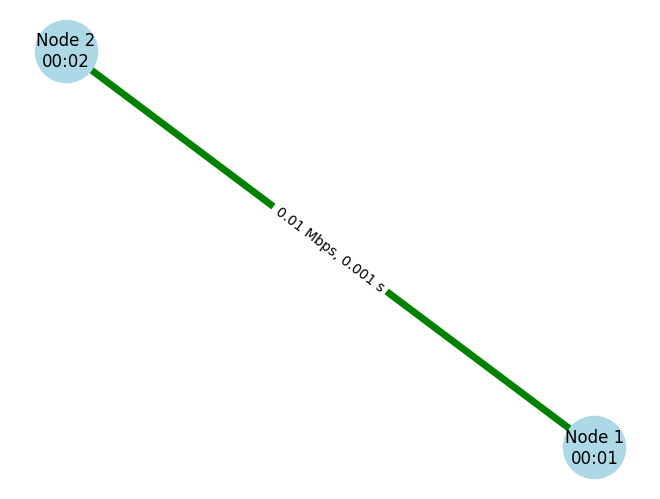

Time: 1.0 Node: 1, Event: created, Packet: 15f1e332-be7a-432a-ab6b-2e895da4144a, Src: 00:01, Dst: 00:02
Time: 1.0 Node: 1, Event: sent, Packet: 15f1e332-be7a-432a-ab6b-2e895da4144a, Src: 00:01, Dst: 00:02
Time: 1.001 Node: 2, Event: arrived, Packet: 15f1e332-be7a-432a-ab6b-2e895da4144a, Src: 00:01, Dst: 00:02
Time: 2.0 Node: 1, Event: created, Packet: caf62367-c579-41a1-91b7-3dea232f17b5, Src: 00:01, Dst: 00:02
Time: 2.0 Node: 1, Event: sent, Packet: caf62367-c579-41a1-91b7-3dea232f17b5, Src: 00:01, Dst: 00:02
Time: 2.001 Node: 2, Event: arrived, Packet: caf62367-c579-41a1-91b7-3dea232f17b5, Src: 00:01, Dst: 00:02
Time: 3.0 Node: 1, Event: created, Packet: f282c24a-903f-4e9a-91a9-6a31a60493f1, Src: 00:01, Dst: 00:02
Time: 3.0 Node: 1, Event: sent, Packet: f282c24a-903f-4e9a-91a9-6a31a60493f1, Src: 00:01, Dst: 00:02
Time: 3.001 Node: 2, Event: arrived, Packet: f282c24a-903f-4e9a-91a9-6a31a60493f1, Src: 00:01, Dst: 00:02
Time: 4.0 Node: 1, Event: created, Packet: fd1e6c0c-5c6b-4fd1-971c-

In [57]:
# Code2.5
# ネットワークイベントスケジューラの作成
network_event_scheduler = NetworkEventScheduler(log_enabled=True, verbose=True)

# ノードとリンクの設定
node1 = Node(node_id=1, address="00:01", network_event_scheduler=network_event_scheduler)
node2 = Node(node_id=2, address="00:02", network_event_scheduler=network_event_scheduler)
link1 = Link(node1, node2, bandwidth=10000, delay=0.001, loss_rate=0.0, network_event_scheduler=network_event_scheduler)

# ネットワークのトポロジを描画
network_event_scheduler.draw()

# 通信アプリケーションの設定
header_size = 40    #　ヘッダサイズを40バイトとする
payload_size = 85   # ペイロードサイズを設定(パケットサイズを40+85=125バイト = 1000ビットに設定)
node1.set_traffic(destination="00:02", bitrate=1000, start_time=1.0, duration=10.0, burstiness=1.0, header_size=header_size, payload_size=payload_size)

# ネットワークイベントスケジューラを実行
network_event_scheduler.run()

In [58]:
# Code2.6
network_event_scheduler.print_packet_logs()

Packet ID: 15f1e332-be7a-432a-ab6b-2e895da4144a Src: 00:01 1.0 -> Dst: 00:02 1.001
Time: 1.0, Event: created
Time: 1.0, Event: sent
Time: 1.001, Event: arrived
Packet ID: caf62367-c579-41a1-91b7-3dea232f17b5 Src: 00:01 2.0 -> Dst: 00:02 2.001
Time: 2.0, Event: created
Time: 2.0, Event: sent
Time: 2.001, Event: arrived
Packet ID: f282c24a-903f-4e9a-91a9-6a31a60493f1 Src: 00:01 3.0 -> Dst: 00:02 3.001
Time: 3.0, Event: created
Time: 3.0, Event: sent
Time: 3.001, Event: arrived
Packet ID: fd1e6c0c-5c6b-4fd1-971c-fb60b14bd6c5 Src: 00:01 4.0 -> Dst: 00:02 4.001
Time: 4.0, Event: created
Time: 4.0, Event: sent
Time: 4.001, Event: arrived
Packet ID: 3ce484b8-9502-48aa-8a38-e62600ce2fb5 Src: 00:01 5.0 -> Dst: 00:02 5.001
Time: 5.0, Event: created
Time: 5.0, Event: sent
Time: 5.001, Event: arrived
Packet ID: ef417bfa-8731-4345-acaa-12d06c9c750c Src: 00:01 6.0 -> Dst: 00:02 6.001
Time: 6.0, Event: created
Time: 6.0, Event: sent
Time: 6.001, Event: arrived
Packet ID: 7d3cf535-24a6-4a82-aaef-eb904

In [59]:
# Code2.7
network_event_scheduler.generate_summary(network_event_scheduler.packet_logs)

Src-Dst Pair: ('00:01', '00:02')
Total Sent Packets: 10
Total Sent Bytes: 1250
Total Received Packets: 10
Total Received Bytes: 1250
Average Throughput (bps): 1110.9876680368848
Average Delay (s): 0.0009999999999999343
Lost Packets: 0



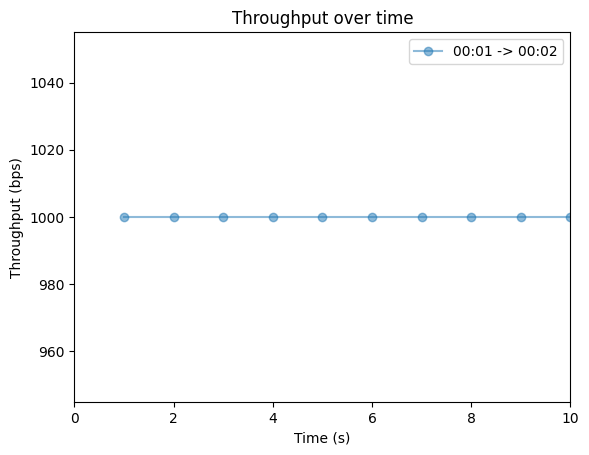

In [60]:
# Code2.8
network_event_scheduler.generate_throughput_graph(network_event_scheduler.packet_logs)

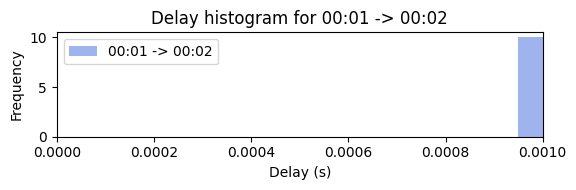

In [61]:
# Code2.9
network_event_scheduler.generate_delay_histogram(network_event_scheduler.packet_logs)

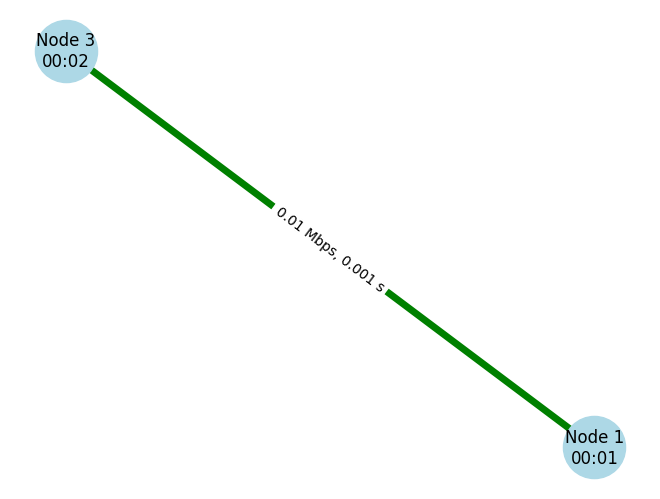

Time: 1.0 Node: 1, Event: created, Packet: c3217adb-7226-454c-9f27-d06e21cec713, Src: 00:01, Dst: 00:02
Time: 1.0 Node: 1, Event: sent, Packet: c3217adb-7226-454c-9f27-d06e21cec713, Src: 00:01, Dst: 00:02
Time: 1.001 Node: 3, Event: arrived, Packet: c3217adb-7226-454c-9f27-d06e21cec713, Src: 00:01, Dst: 00:02
Time: 2.0 Node: 3, Event: created, Packet: d2efbf41-2ef1-4e66-a1f9-1144c0f8de5d, Src: 00:02, Dst: 00:01
Time: 2.0 Node: 3, Event: sent, Packet: d2efbf41-2ef1-4e66-a1f9-1144c0f8de5d, Src: 00:02, Dst: 00:01
Time: 2.0 Node: 1, Event: created, Packet: c7914da4-66a0-470f-bb3f-0e9f70520f18, Src: 00:01, Dst: 00:02
Time: 2.0 Node: 1, Event: sent, Packet: c7914da4-66a0-470f-bb3f-0e9f70520f18, Src: 00:01, Dst: 00:02
Time: 2.001 Node: 1, Event: arrived, Packet: d2efbf41-2ef1-4e66-a1f9-1144c0f8de5d, Src: 00:02, Dst: 00:01
Time: 2.001 Node: 3, Event: arrived, Packet: c7914da4-66a0-470f-bb3f-0e9f70520f18, Src: 00:01, Dst: 00:02
Time: 2.2 Node: 3, Event: created, Packet: 606c71c9-153c-45db-a71f-

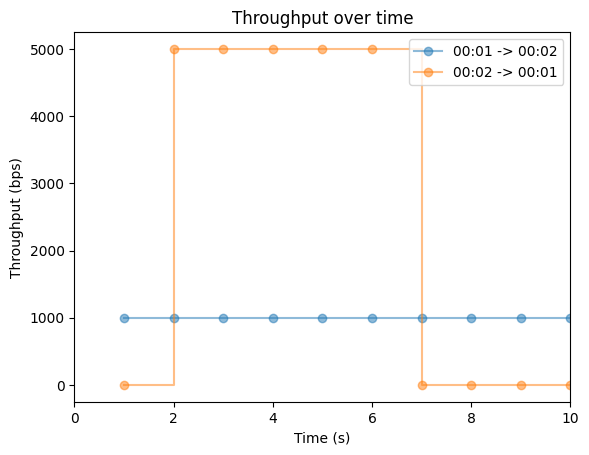

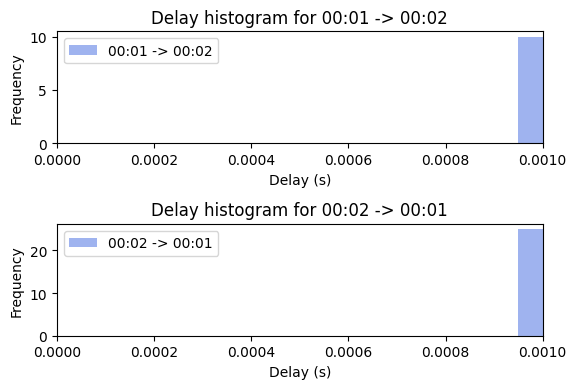

In [62]:
# Practice1-1,2
# ネットワークイベントスケジューラの作成
network_event_scheduler = NetworkEventScheduler(log_enabled=True, verbose=True)

# ノードとリンクの設定
node1 = Node(node_id=1, address="00:01", network_event_scheduler=network_event_scheduler)
node2 = Node(node_id=3, address="00:02", network_event_scheduler=network_event_scheduler)
link1 = Link(node1, node2, bandwidth=10000, delay=0.001, loss_rate=0.0, network_event_scheduler=network_event_scheduler)

# ネットワークのトポロジを描画
network_event_scheduler.draw()

# 通信アプリケーションの設定
header_size = 40    #　ヘッダサイズを40バイトとする
payload_size = 85   # ペイロードサイズを設定(パケットサイズを40+85=125バイト = 1000ビットに設定)
node1.set_traffic(destination="00:02", bitrate=1000, start_time=1.0, duration=10.0, burstiness=1.0, header_size=header_size, payload_size=payload_size)
node2.set_traffic(destination="00:01", bitrate=5000, start_time=2.0, duration=5.0, burstiness=1.0, header_size=header_size, payload_size=payload_size)

# ネットワークイベントスケジューラを実行
network_event_scheduler.run()

network_event_scheduler.generate_summary(network_event_scheduler.packet_logs)
network_event_scheduler.generate_throughput_graph(network_event_scheduler.packet_logs)
network_event_scheduler.generate_delay_histogram(network_event_scheduler.packet_logs)

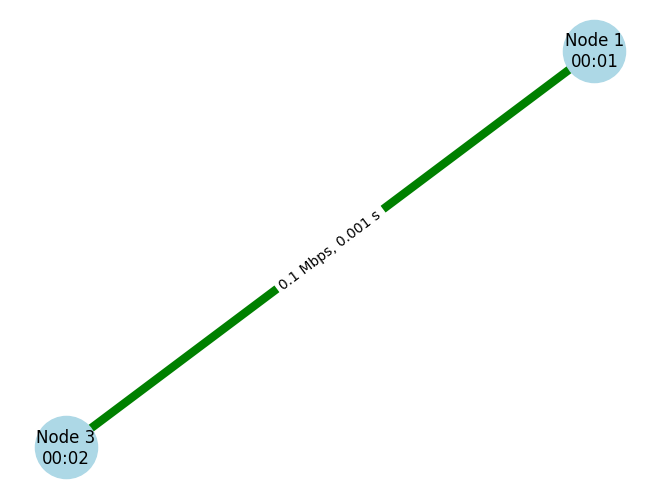

Time: 1.0 Node: 1, Event: created, Packet: 22dd9070-9af0-498d-b965-d32c8bf5c708, Src: 00:01, Dst: 00:02
Time: 1.0 Node: 1, Event: sent, Packet: 22dd9070-9af0-498d-b965-d32c8bf5c708, Src: 00:01, Dst: 00:02
Time: 1.001 Node: 3, Event: arrived, Packet: 22dd9070-9af0-498d-b965-d32c8bf5c708, Src: 00:01, Dst: 00:02
Time: 1.02 Node: 1, Event: created, Packet: bbb89a20-f7fa-4e05-a265-acf8c61a7e4e, Src: 00:01, Dst: 00:02
Time: 1.02 Node: 1, Event: sent, Packet: bbb89a20-f7fa-4e05-a265-acf8c61a7e4e, Src: 00:01, Dst: 00:02
Time: 1.021 Node: 3, Event: arrived, Packet: bbb89a20-f7fa-4e05-a265-acf8c61a7e4e, Src: 00:01, Dst: 00:02
Time: 1.04 Node: 1, Event: created, Packet: 98340291-67a5-423a-9907-a8be052d3d67, Src: 00:01, Dst: 00:02
Time: 1.04 Node: 1, Event: sent, Packet: 98340291-67a5-423a-9907-a8be052d3d67, Src: 00:01, Dst: 00:02
Time: 1.041 Node: 3, Event: arrived, Packet: 98340291-67a5-423a-9907-a8be052d3d67, Src: 00:01, Dst: 00:02
Time: 1.06 Node: 1, Event: created, Packet: 7c173a3f-88db-4c05-

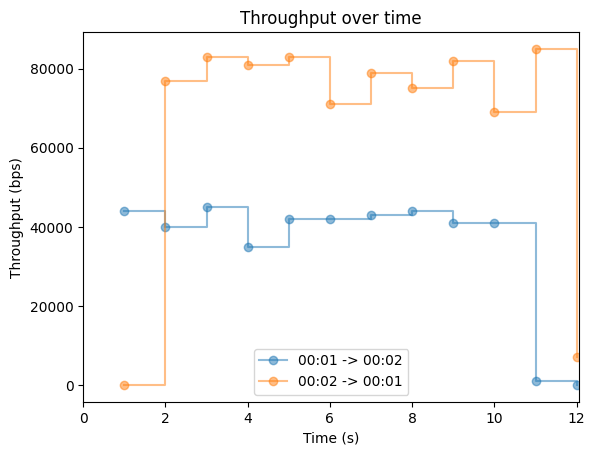

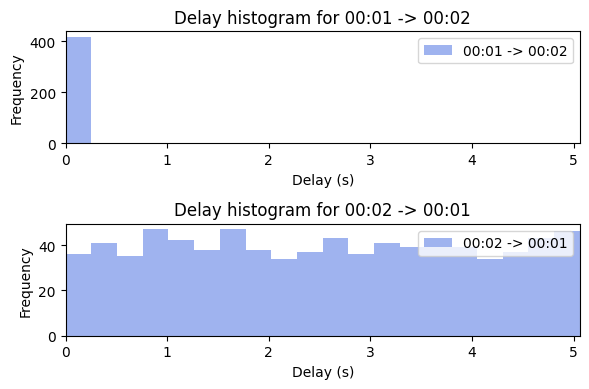

In [63]:
# Practice1-3,4,5
# ネットワークイベントスケジューラの作成
network_event_scheduler = NetworkEventScheduler(log_enabled=True, verbose=True)

# ノードとリンクの設定
node1 = Node(node_id=1, address="00:01", network_event_scheduler=network_event_scheduler)
node2 = Node(node_id=3, address="00:02", network_event_scheduler=network_event_scheduler)
link1 = Link(node1, node2, bandwidth=100000, delay=0.001, loss_rate=0.2, network_event_scheduler=network_event_scheduler)

# ネットワークのトポロジを描画
network_event_scheduler.draw()

# 通信アプリケーションの設定
header_size = 40    #　ヘッダサイズを40バイトとする
payload_size = 85   # ペイロードサイズを設定(パケットサイズを40+85=125バイト = 1000ビットに設定)
node1.set_traffic(destination="00:02", bitrate=50000, start_time=1.0, duration=10.0, burstiness=1.0, header_size=header_size, payload_size=payload_size)
node2.set_traffic(destination="00:01", bitrate=200000, start_time=2.0, duration=5.0, burstiness=1.0, header_size=header_size, payload_size=payload_size)

# ネットワークイベントスケジューラを実行
network_event_scheduler.run()

network_event_scheduler.generate_summary(network_event_scheduler.packet_logs)
network_event_scheduler.generate_throughput_graph(network_event_scheduler.packet_logs)
network_event_scheduler.generate_delay_histogram(network_event_scheduler.packet_logs)

## 第3章　スイッチとMACアドレス

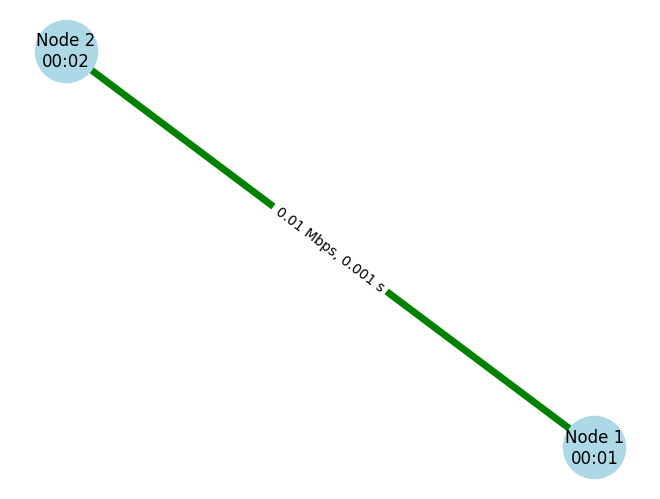

Src-Dst Pair: ('00:01', '00:02')
Total Sent Packets: 10
Total Sent Bytes: 1250
Total Received Packets: 10
Total Received Bytes: 1250
Average Throughput (bps): 1110.9876680368848
Average Delay (s): 0.0009999999999999343
Lost Packets: 0

Src-Dst Pair: ('00:02', '00:02')
Total Sent Packets: 30
Total Sent Bytes: 3750
Total Received Packets: 30
Total Received Bytes: 3750
Average Throughput (bps): 5172.413793103444
Average Delay (s): 0.0
Lost Packets: 0



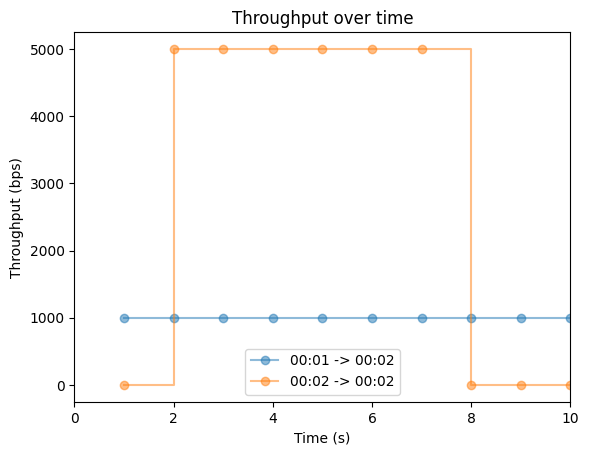

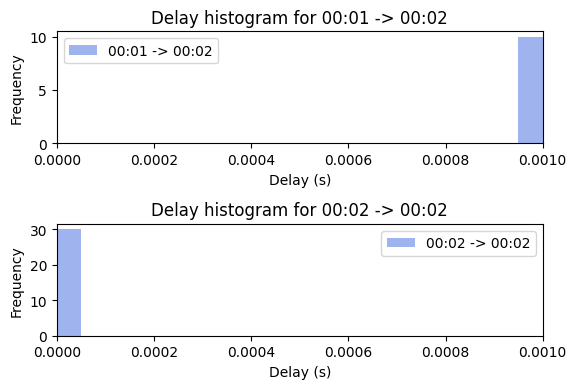

In [64]:
# Code3.1

# グローバルネットワークイベントスケジューラのインスタンスを新たに作成
network_event_scheduler = NetworkEventScheduler(log_enabled=True, verbose=False)

# ノードとリンクの設定
node1 = Node(node_id=1, address="00:01", network_event_scheduler=network_event_scheduler)
node2 = Node(node_id=2, address="00:02", network_event_scheduler=network_event_scheduler)
link1 = Link(node1, node2, bandwidth=10000, delay=0.001, loss_rate=0.0, network_event_scheduler=network_event_scheduler)

# ネットワークのトポロジを描画
network_event_scheduler.draw()

# 通信アプリケーションの設定
node1.set_traffic(destination="00:02",bitrate=1000,start_time=1.0, duration=10.0, burstiness=1.0, header_size=40, payload_size=85)
node2.set_traffic(destination="00:02",bitrate=5000,start_time=2.0, duration=6.0, burstiness=1.0, header_size=40, payload_size=85)

# イベントスケジューラの実行
network_event_scheduler.run()

# 結果を確認
network_event_scheduler.generate_summary(network_event_scheduler.packet_logs)
network_event_scheduler.generate_throughput_graph(network_event_scheduler.packet_logs)
network_event_scheduler.generate_delay_histogram(network_event_scheduler.packet_logs)

In [65]:
# 3.2
class Switch:
    def __init__(self, node_id, network_event_scheduler):
        # スイッチの初期化
        # network_event_scheduler: スイッチが属するネットワークイベントスケジューラへの参照
        # node_id: スイッチの一意の識別子
        # links: スイッチに接続されているリンクのリスト
        # forwarding_table: 宛先アドレスに基づいてパケットを送信するためのテーブル
        self.network_event_scheduler = network_event_scheduler
        self.node_id = node_id
        self.links = []
        self.forwarding_table = {}
        label = f'Switch {node_id}'
        self.network_event_scheduler.add_node(node_id, label)

    def add_link(self, link):
        # スイッチに新しいリンクを追加するメソッド
        if link not in self.links:
            self.links.append(link)
    
    def update_forwarding_table(self, destination_address, link):
        # フォワーディングテーブルを更新するメソッド
        # destination_address: 宛先アドレス
        # link: その宛先アドレスへのパケットを転送するためのリンク
        self.forwarding_table[destination_address] = link
    
    def receive_packet(self, packet):
        # スイッチがパケットを受信したときの処理を行うメソッド
        # パケットが失われた場合（到着時間が-1）は、その情報をログに記録
        if packet.arrival_time == -1:
            self.network_event_scheduler.log_packet_info(packet, "lost", self.node_id)
        
        # パケットが正常に到着した場合は、受信情報をログに記録し、転送処理を行う
        self.network_event_scheduler.log_packet_info(packet, "received", self.node_id)
        self.forward_packet(packet)

    def forward_packet(self, packet):
        # フォワーディングテーブルを使用してパケットを転送するメソッド
        # destination_address: パケットの宛先アドレス
        # 宛先アドレスがフォワーディングテーブルに存在する場合、対応するリンクにパケットを転送
        destination_address = packet.header["destination"]
        if destination_address in self.forwarding_table:
            link = self.forwarding_table[destination_address]
            self.network_event_scheduler.log_packet_info(packet, "forwarded", self.node_id)
            link.enqueue_packet(packet, self)
        else:
            # 宛先がテーブルにない場合の処理（現段階では未実装）
            pass
    
    def __str__(self):
        # 接続されているノードのIDを取得
        connected_nodes = [link.node_x.node_id if self.node_id != link.node_x.node_id else link.node_y.node_id for link in self.links]
        connected_nodes_str = ', '.join(map(str, connected_nodes))
        return f"スイッチ(ID: {self.node_id}, 接続: {connected_nodes_str})"


In [68]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq
import numpy as np
from collections import defaultdict

class NetworkEventScheduler:
    def __init__(self, log_enabled=False, verbose=False):
        self.current_time = 0
        self.events = []
        self.event_id = 0
        self.packet_logs = {}
        self.log_enabled = log_enabled
        self.verbose = verbose
        self.graph = nx.Graph()

    def add_node(self, node_id, label):
        self.graph.add_node(node_id, label=label)

    def add_link(self, node1_id, node2_id, label, bandwidth, delay):
        self.graph.add_edge(node1_id, node2_id, label=label, bandwidth=bandwidth, delay=delay)

    def draw(self):
        def get_edge_width(bandwidth):
            return np.log10(bandwidth) + 1

        def get_edge_color(delay):
            if delay <= 0.001:  # <= 1ms
                return 'green'
            elif delay <= 0.01:  # 1-10ms
                return 'yellow'
            else:  # >= 10ms
                return 'red'

        pos = nx.spring_layout(self.graph)

        edge_widths = [get_edge_width(self.graph[u][v]['bandwidth']) for u, v in self.graph.edges()]
        edge_colors = [get_edge_color(self.graph[u][v]['delay']) for u, v in self.graph.edges()]
        nx.draw_networkx_edges(self.graph, pos, width=edge_widths, edge_color=edge_colors)

        for node, data in self.graph.nodes(data=True):
            if 'Switch' in data['label']: # Switch
                nx.draw_networkx_nodes(self.graph, pos, nodelist=[node], node_color='red', node_shape='s', node_size=2000)
            else: # Node
                nx.draw_networkx_nodes(self.graph, pos, nodelist=[node], node_color='lightblue', node_shape='o', node_size=2000)

        nx.draw_networkx_labels(self.graph, pos, labels=nx.get_node_attributes(self.graph, 'label'))
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=nx.get_edge_attributes(self.graph, 'label'))
        plt.show()

    def schedule_event(self, event_time, callback, *args):
        event = (event_time, self.event_id, callback, args)
        heapq.heappush(self.events, event)
        self.event_id += 1

    def log_packet_info(self, packet, event_type, node_id=None):
        if self.log_enabled:
            if packet.id not in self.packet_logs:
                self.packet_logs[packet.id] = {
                    "source": packet.header["source"],
                    "destination": packet.header["destination"],
                    "size": packet.size,
                    "creation_time": packet.creation_time,
                    "arrival_time": packet.arrival_time,
                    "events": []
                }

            if event_type == "arrived":
                self.packet_logs[packet.id]["arrival_time"] = self.current_time

            event_info = {
                "time": self.current_time,
                "event": event_type,
                "node_id": node_id,
                "packet_id": packet.id,
                "src": packet.header["source"],
                "dst": packet.header["destination"]
            }
            self.packet_logs[packet.id]["events"].append(event_info)

            if self.verbose:
                print(f"Time: {self.current_time} Node: {node_id}, Event: {event_type}, Packet: {packet.id}, Src: {packet.header['source']}, Dst: {packet.header['destination']}")


    def print_packet_logs(self):
        for packet_id, log in self.packet_logs.items():
            print(f"Packet ID: {packet_id} Src: {log['source']} {log['creation_time']} -> Dst: {log['destination']} {log['arrival_time']}")
            for event in log['events']:
                print(f"Time: {event['time']}, Event: {event['event']}")

    def generate_summary(self, packet_logs):
        summary_data = defaultdict(lambda: {"sent_packets": 0, "sent_bytes": 0, "received_packets": 0, "received_bytes": 0, "total_delay": 0, "lost_packets": 0, "min_creation_time": float('inf'), "max_arrival_time": 0})

        for packet_id, log in packet_logs.items():
            src_dst_pair = (log["source"], log["destination"])
            summary_data[src_dst_pair]["sent_packets"] += 1
            summary_data[src_dst_pair]["sent_bytes"] += log["size"]
            summary_data[src_dst_pair]["min_creation_time"] = min(summary_data[src_dst_pair]["min_creation_time"], log["creation_time"])

            if "arrival_time" in log and log["arrival_time"] is not None:
                summary_data[src_dst_pair]["received_packets"] += 1
                summary_data[src_dst_pair]["received_bytes"] += log["size"]
                summary_data[src_dst_pair]["total_delay"] += log["arrival_time"] - log["creation_time"]
                summary_data[src_dst_pair]["max_arrival_time"] = max(summary_data[src_dst_pair]["max_arrival_time"], log["arrival_time"])
            else:
                summary_data[src_dst_pair]["lost_packets"] += 1

        for src_dst, data in summary_data.items():
            sent_packets = data["sent_packets"]
            sent_bytes = data["sent_bytes"]
            received_packets = data["received_packets"]
            received_bytes = data["received_bytes"]
            total_delay = data["total_delay"]
            lost_packets = data["lost_packets"]
            min_creation_time = data["min_creation_time"]
            max_arrival_time = data["max_arrival_time"]

            traffic_duration = max_arrival_time - min_creation_time
            avg_throughput = (received_bytes * 8 / traffic_duration) if traffic_duration > 0 else 0
            avg_delay = total_delay / received_packets if received_packets > 0 else 0

            print(f"Src-Dst Pair: {src_dst}")
            print(f"Total Sent Packets: {sent_packets}")
            print(f"Total Sent Bytes: {sent_bytes}")
            print(f"Total Received Packets: {received_packets}")
            print(f"Total Received Bytes: {received_bytes}")
            print(f"Average Throughput (bps): {avg_throughput}")
            print(f"Average Delay (s): {avg_delay}")
            print(f"Lost Packets: {lost_packets}\n")

    def generate_throughput_graph(self, packet_logs):
        time_slot = 1.0  # 時間スロットを1秒に固定

        max_time = max(log['arrival_time'] for log in packet_logs.values() if log['arrival_time'] is not None)
        min_time = min(log['creation_time'] for log in packet_logs.values())
        num_slots = int((max_time - min_time) / time_slot) + 1  # スロットの総数を計算

        throughput_data = defaultdict(list)
        for packet_id, log in packet_logs.items():
            if log['arrival_time'] is not None:
                src_dst_pair = (log['source'], log['destination'])
                slot_index = int((log['arrival_time'] - min_time) / time_slot)
                throughput_data[src_dst_pair].append((slot_index, log['size']))

        aggregated_throughput = defaultdict(lambda: defaultdict(int))
        for src_dst, packets in throughput_data.items():
            for slot_index in range(num_slots):
                slot_throughput = sum(size * 8 for i, size in packets if i == slot_index)
                aggregated_throughput[src_dst][slot_index] = slot_throughput / time_slot

        for src_dst, slot_data in aggregated_throughput.items():
            time_slots = list(range(num_slots))
            throughputs = [slot_data[slot] for slot in time_slots]
            times = [min_time + slot * time_slot for slot in time_slots]
            plt.step(times, throughputs, label=f'{src_dst[0]} -> {src_dst[1]}', where='post', linestyle='-', alpha=0.5, marker='o')

        plt.xlabel('Time (s)')
        plt.ylabel('Throughput (bps)')
        plt.title('Throughput over time')
        plt.xlim(0, max_time)
        plt.legend()
        plt.show()

    def generate_delay_histogram(self, packet_logs):
        delay_data = defaultdict(list)
        for packet_id, log in packet_logs.items():
            if log['arrival_time'] is not None:
                src_dst_pair = (log['source'], log['destination'])
                delay = log['arrival_time'] - log['creation_time']
                delay_data[src_dst_pair].append(delay)

        num_plots = len(delay_data)
        num_bins = 20
        fig, axs = plt.subplots(num_plots, figsize=(6, 2 * num_plots))
        max_delay = max(max(delays) for delays in delay_data.values())
        bin_width = max_delay / num_bins

        for i, (src_dst, delays) in enumerate(delay_data.items()):
            ax = axs[i] if num_plots > 1 else axs
            ax.hist(delays, bins=np.arange(0, max_delay + bin_width, bin_width), alpha=0.5, color='royalblue', label=f'{src_dst[0]} -> {src_dst[1]}')
            ax.set_xlabel('Delay (s)')
            ax.set_ylabel('Frequency')
            ax.set_title(f'Delay histogram for {src_dst[0]} -> {src_dst[1]}')
            ax.set_xlim(0, max_delay)
            ax.legend()

        plt.tight_layout()
        plt.show()

    def run(self):
        while self.events:
            event_time, _, callback, args = heapq.heappop(self.events)
            self.current_time = event_time
            callback(*args)

    def run_until(self, end_time):
        while self.events and self.events[0][0] <= end_time:
            event_time, callback, args = heapq.heappop(self.events)
            self.current_time = event_time
            callback(*args)


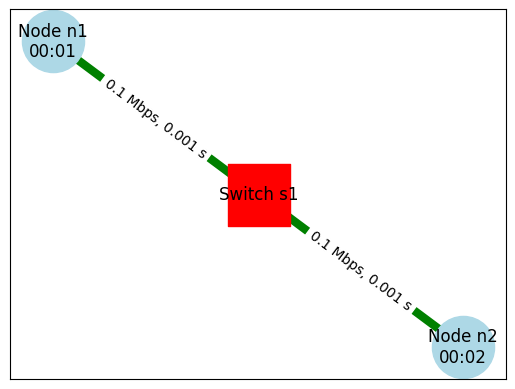

Src-Dst Pair: ('00:01', '00:02')
Total Sent Packets: 101
Total Sent Bytes: 12625
Total Received Packets: 101
Total Received Bytes: 12625
Average Throughput (bps): 10097.980403919239
Average Delay (s): 0.0019999999999998678
Lost Packets: 0



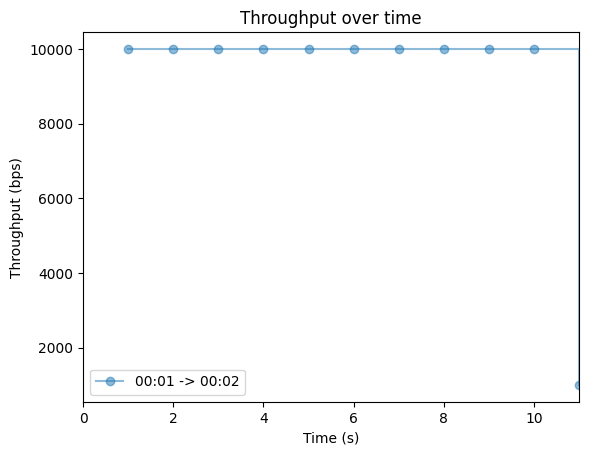

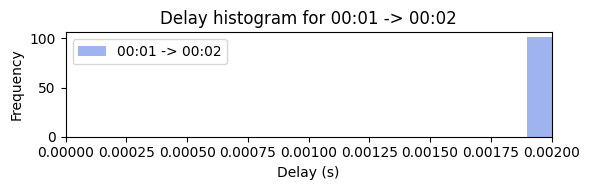

In [69]:
# Code3.3
# グローバルネットワークイベントスケジューラのインスタンスを作成
network_event_scheduler = NetworkEventScheduler(log_enabled=True, verbose=False)

# ノードとスイッチの設定
node1 = Node(node_id="n1", address="00:01", network_event_scheduler=network_event_scheduler)
node2 = Node(node_id="n2", address="00:02", network_event_scheduler=network_event_scheduler)
switch1 = Switch(node_id="s1", network_event_scheduler=network_event_scheduler)

# リンクの設定
# node1とswitch1、node2とswitch1をそれぞれリンクで接続
link1 = Link(node1, switch1, bandwidth=100000, delay=0.001, loss_rate=0.0, network_event_scheduler=network_event_scheduler)
link2 = Link(node2, switch1, bandwidth=100000, delay=0.001, loss_rate=0.0, network_event_scheduler=network_event_scheduler)

# スイッチのフォワーディングテーブルを設定
# node1のアドレス宛のパケットはlink1を通じて、node2のアドレス宛てのパケットはlink2を通じて転送される
switch1.update_forwarding_table(node1.address, link1)
switch1.update_forwarding_table(node2.address, link2)

# ネットワークのトポロジを描画
network_event_scheduler.draw()

# 通信アプリケーションの設定
# node1からnode2へのトラフィックを設定
node1.set_traffic(destination="00:02",bitrate=10000,start_time=1.0, duration=10.0, burstiness=1.0, header_size=40, payload_size=85)

# イベントスケジューラの実行
network_event_scheduler.run()

# 結果を確認
# ネットワーク上でのパケットの流れとパフォーマンスに関するサマリを生成
network_event_scheduler.generate_summary(network_event_scheduler.packet_logs)
network_event_scheduler.generate_throughput_graph(network_event_scheduler.packet_logs)
network_event_scheduler.generate_delay_histogram(network_event_scheduler.packet_logs)